<h1>Dataset Introduction</h1>

<p>
This dataset contains information compiled by the World Health Organization and the United Nations to track factors that affect life expectancy. The data contains 2938 rows and 22 columns. The columns include: country, year, developing status, adult mortality, life expectancy, infant deaths, alcohol consumption per capita, country’s expenditure on health, immunization coverage, BMI, deaths under 5-years-old, deaths due to HIV/AIDS, GDP, population, body condition, income information, and education.  
</P>

<h1>Tasks</h1>
<ul>
    <li>Does various predicting factors which has been chosen initially really affect the Life expectancy?</li>
    <li>What are the predicting variables actually affecting the life expectancy?</li>
    <li>How does Infant and Adult mortality rates affect life expectancy?</li>
    <li>Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.</li>
    <li>What is the impact of schooling on the lifespan of humans?</li>
    <li>Does Life Expectancy have positive or negative relationship with drinking alcohol?</li>
    <li>Do densely populated countries tend to have lower life expectancy?</li>   
    <li>What is the impact of Immunization coverage on life Expectancy?</li>
    
 </ul>


<h1>Columns Description</h1>
<ol>
    <li>Country- Country</li>
    <li>Year- Year</li>
    <li>Status- Developed or Developing status</li>
    <li>Life Expectancy- Age(years)</li>
    <li>Adult Mortality- Adult Mortality Rates of both sexes(probability of dying between 15&60 years per 1000 population)</li>
    <li>Infant Deaths- Number of Infant Deaths per 1000 population</li>
    <li>Alcohol- Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)</li>
    <li>Percent Expenditure- Expenditure on health as a percentage of Gross Domestic Product per capita(%)</li>
    <li>Hep B- Hepatitis B (HepB) immunization coverage among 1-year-olds(%)</li>
    <li>Measles- number of reported measles cases per 1000 population</li>
    <li>BMI- Average Body Mass Index of entire population</li>
    <li>U-5 Deaths- Number of under-five deaths per 1000 population</li>
    <li>Polio- Polio(Pol3) immunization coverage among 1-year-olds(%)</li>
    <li>Total Expenditure- General government expenditure on health as a percentage of total government expenditure(%)</li>
    <li>Diphtheria- Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds(%)</li>
    <li>HIV/AIDS- Deaths per 1000 live births HIV/AIDS(0-4 years)</li>
    <li>GDP- Gross Domestic Product per capita(in USD)</li>
    <li>Population- Population  </li>
    <li>Thinness 10-19- Prevalence of thinness among children and adolescents for Age 10 to 19(%)</li>
    <li>Thinness 5-9- Prevalence of thinness among children for Age 5 to 9(%)</li>
    <li>ncome Composition- Human Development Index in terms of income composition of resources(0-1)</li>
    <li>Schooling- Number of years of Schooling</li>
    
</ol>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
%matplotlib inline

# Reading Data

In [3]:
df = pd.read_csv('Life_Expectancy_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

*** Total 22 columns Decimal 11 Integer 9 String 2 ***

In [4]:
df.shape # Dataset Shape

(2938, 22)

In [5]:
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [6]:
df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

#### Number of unique items in dataset

In [7]:
df.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

### Rename Columns

In [8]:
df.columns = df.columns.str.lower().str.strip('_').str.replace(' ','_')
df.columns = df.columns.str.lower().str.strip('_').str.replace(' ','_')

In [9]:
df.head()

country  year      status  life_expectancy  adult_mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant_deaths  alcohol  percentage_expenditure  hepatitis_b  measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   polio  total_expenditure  diphtheria  hiv/aids         gdp  population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   
3   67.0               8.52        67.0       0.1  669.959000   3696958.0   
4   68.0               7.87        68.0       0.1   63.537231   2978599.0   

   thinness__1-19_years  thinness_5-9_years  income_composition_of_resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   

   schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 22 columns]

### Missing Valus

In [10]:
df.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness__1-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

*** Fill NA/missing values in a Pandas time series. The interpolate() function is used to interpolate values according to different methods ***

In [11]:
for col in df.columns:
    df[col] = df[col].interpolate(method='linear',limit_direction='both')

In [12]:
df.isnull().sum()

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under-five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness__1-19_years               0
thinness_5-9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64

### EDA

In [13]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

### HIV/Aids VS Life Expectance

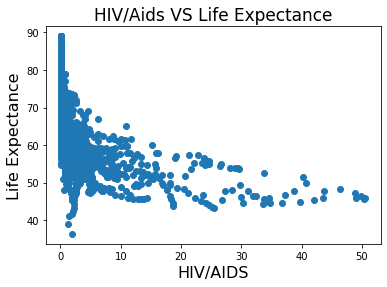

In [14]:
plt.scatter(df['hiv/aids'], df['life_expectancy'])
plt.title('HIV/Aids VS Life Expectance', fontsize=17)
plt.xlabel('HIV/AIDS', fontsize=16)
plt.ylabel('Life Expectance', fontsize=16)
plt.show()

### GDP VS Life Expectance

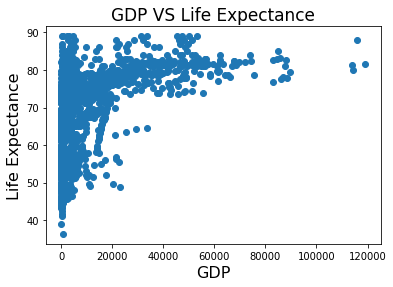

In [15]:
plt.scatter(df['gdp'], df['life_expectancy'])
plt.title('GDP VS Life Expectance', fontsize=17)
plt.xlabel('GDP', fontsize=16)
plt.ylabel('Life Expectance', fontsize=16)
plt.show()

### BMI VS Life Expectance

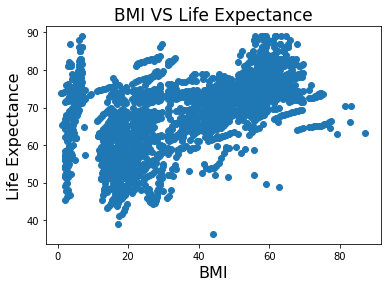

In [16]:
plt.scatter(df['bmi'], df['life_expectancy'])
plt.title('BMI VS Life Expectance', fontsize=17)
plt.xlabel('BMI', fontsize=16)
plt.ylabel('Life Expectance', fontsize=16)
plt.show()

In [17]:
### Alcohol VS Life Expectance

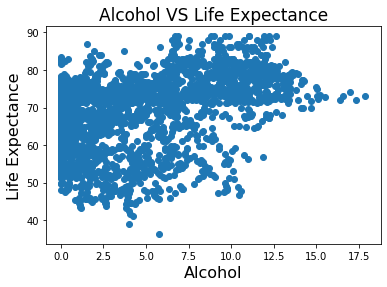

In [18]:
plt.scatter(df['alcohol'], df['life_expectancy'])
plt.title('Alcohol VS Life Expectance', fontsize=17)
plt.xlabel('Alcohol', fontsize=16)
plt.ylabel('Life Expectance', fontsize=16)
plt.show()

In [19]:
### Adult Mortality VS Life Expectance

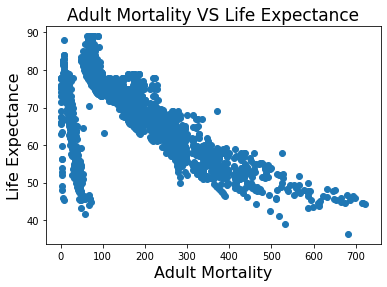

In [20]:
plt.scatter(df['adult_mortality'], df['life_expectancy'])
plt.title('Adult Mortality VS Life Expectance', fontsize=17)
plt.xlabel('Adult Mortality', fontsize=16)
plt.ylabel('Life Expectance', fontsize=16)
plt.show()

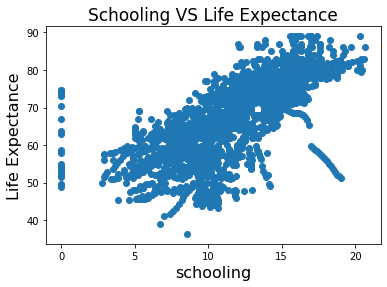

In [21]:
plt.scatter(df['schooling'], df['life_expectancy'])
plt.title('Schooling VS Life Expectance', fontsize=17)
plt.xlabel('schooling', fontsize=16)
plt.ylabel('Life Expectance', fontsize=16)
plt.show()

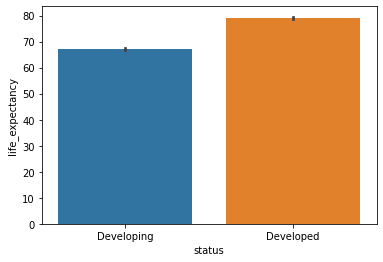

In [22]:
### Devloping Country Average Life Expectancey Is Higher 
sns.barplot(x='status',y='life_expectancy',data=df)

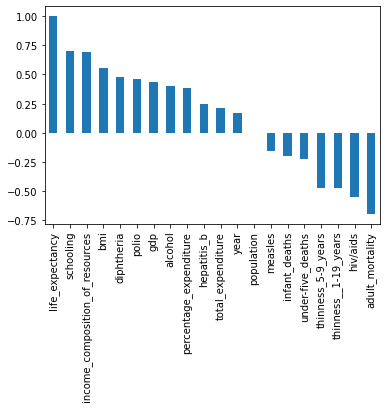

In [23]:
df.corr()['life_expectancy'].sort_values(ascending=False).plot(kind='bar') ## Correlation with other values

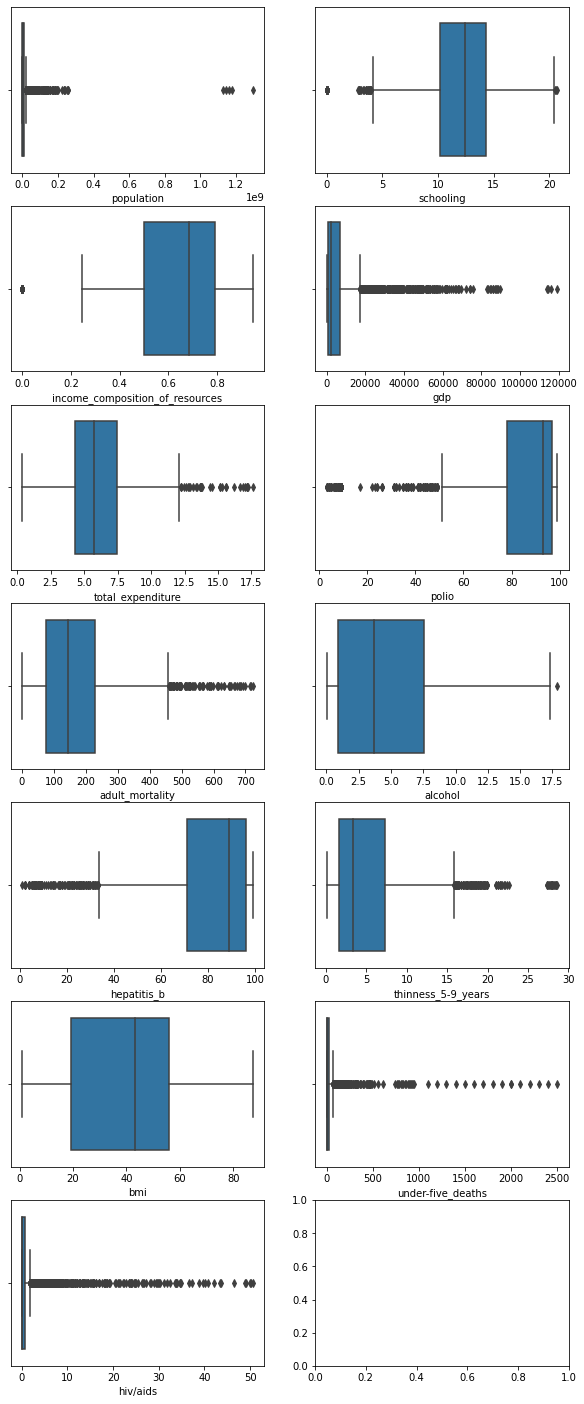

In [24]:
fig, axes = plt.subplots(7,2,figsize=(10,25))
sns.boxplot(df['population'], ax=axes[0,0])

sns.boxplot(df['schooling'],ax=axes[0,1])

sns.boxplot(df['income_composition_of_resources'],ax=axes[1,0])
sns.boxplot(df['gdp'],ax=axes[1,1])

sns.boxplot(df['total_expenditure'],ax=axes[2,0])
sns.boxplot(df['polio'],ax=axes[2,1])

sns.boxplot(df['adult_mortality'],ax=axes[3,0])
sns.boxplot(df['alcohol'],ax=axes[3,1])

sns.boxplot(df['hepatitis_b'],ax=axes[4,0])
sns.boxplot(df['thinness_5-9_years'],ax=axes[4,1])

sns.boxplot(df['bmi'],ax=axes[5,0])
sns.boxplot(df['under-five_deaths'],ax=axes[5,1])
sns.boxplot(df['hiv/aids'],ax=axes[6,0])


In [25]:
df.corr()

year  life_expectancy  adult_mortality  \
year                             1.000000         0.168309        -0.079264   
life_expectancy                  0.168309         1.000000        -0.695730   
adult_mortality                 -0.079264        -0.695730         1.000000   
infant_deaths                   -0.037415        -0.196197         0.078762   
alcohol                         -0.063976         0.400319        -0.194441   
percentage_expenditure           0.031400         0.382069        -0.242587   
hepatitis_b                      0.146261         0.248074        -0.163298   
measles                         -0.082493        -0.157298         0.031226   
bmi                              0.100417         0.556433        -0.383224   
under-five_deaths               -0.042937        -0.222151         0.094134   
polio                            0.095580         0.459865        -0.272553   
total_expenditure                0.079139         0.210744        -0.116144   
diphtheria                       0.135174         0.474084        -0.273311   
hiv/aids                        -0.139741        -0.555929         0.523245   
gdp                              0.090543         0.436281        -0.284048   
population                       0.020222        -0.006621        -0.025985   
thinness__1-19_years            -0.038570        -0.476809         0.307734   
thinness_5-9_years              -0.040661        -0.472485         0.314769   
income_composition_of_resources  0.224113         0.690883        -0.441464   
schooling                        0.186023         0.704294        -0.431516   

                                 infant_deaths   alcohol  \
year                                 -0.037415 -0.063976   
life_expectancy                      -0.196197  0.400319   
adult_mortality                       0.078762 -0.194441   
infant_deaths                         1.000000 -0.114917   
alcohol                              -0.114917  1.000000   
percentage_expenditure               -0.085612  0.337787   
hepatitis_b                          -0.200878  0.092652   
measles                               0.501128 -0.050564   
bmi                                  -0.226540  0.319949   
under-five_deaths                     0.996629 -0.112119   
polio                                -0.169385  0.223014   
total_expenditure                    -0.126082  0.289653   
diphtheria                           -0.173944  0.218868   
hiv/aids                              0.025231 -0.048292   
gdp                                  -0.107542  0.342042   
population                            0.538537 -0.029207   
thinness__1-19_years                  0.462953 -0.420387   
thinness_5-9_years                    0.467439 -0.408521   
income_composition_of_resources      -0.132427  0.442584   
schooling                            -0.173890  0.507433   

                                 percentage_expenditure  hepatitis_b  \
year                                           0.031400     0.146261   
life_expectancy                                0.382069     0.248074   
adult_mortality                               -0.242587    -0.163298   
infant_deaths                                 -0.085612    -0.200878   
alcohol                                        0.337787     0.092652   
percentage_expenditure                         1.000000    -0.033398   
hepatitis_b                                   -0.033398     1.000000   
measles                                       -0.056596    -0.129593   
bmi                                            0.228084     0.172900   
under-five_deaths                             -0.087852    -0.208691   
polio                                          0.147584     0.446177   
total_expenditure                              0.169818     0.088883   
diphtheria                                     0.144017     0.533033   
hiv/aids                                      -0.097857    -0.117463   
gdp                                 

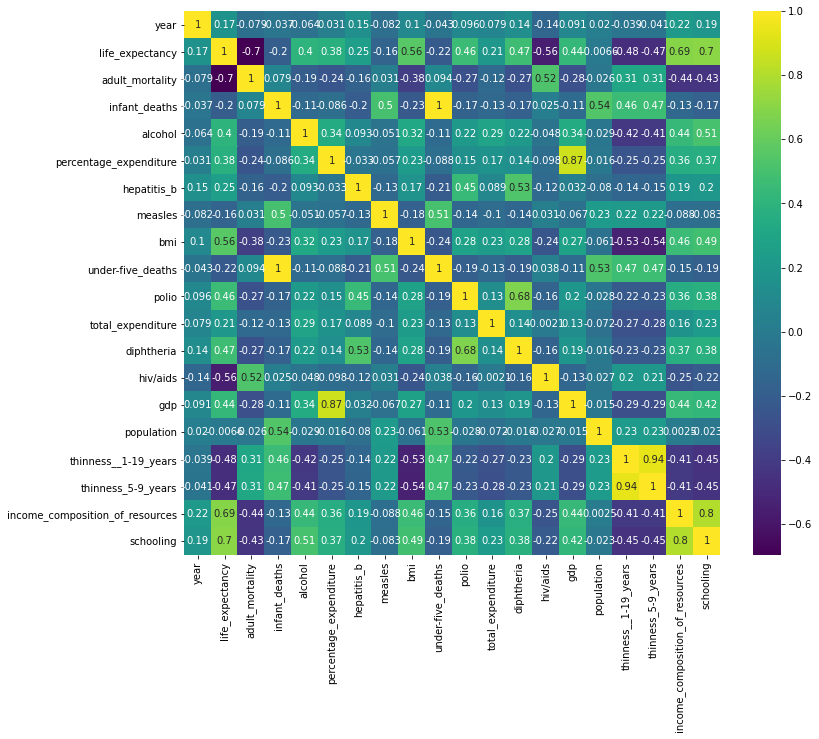

In [26]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

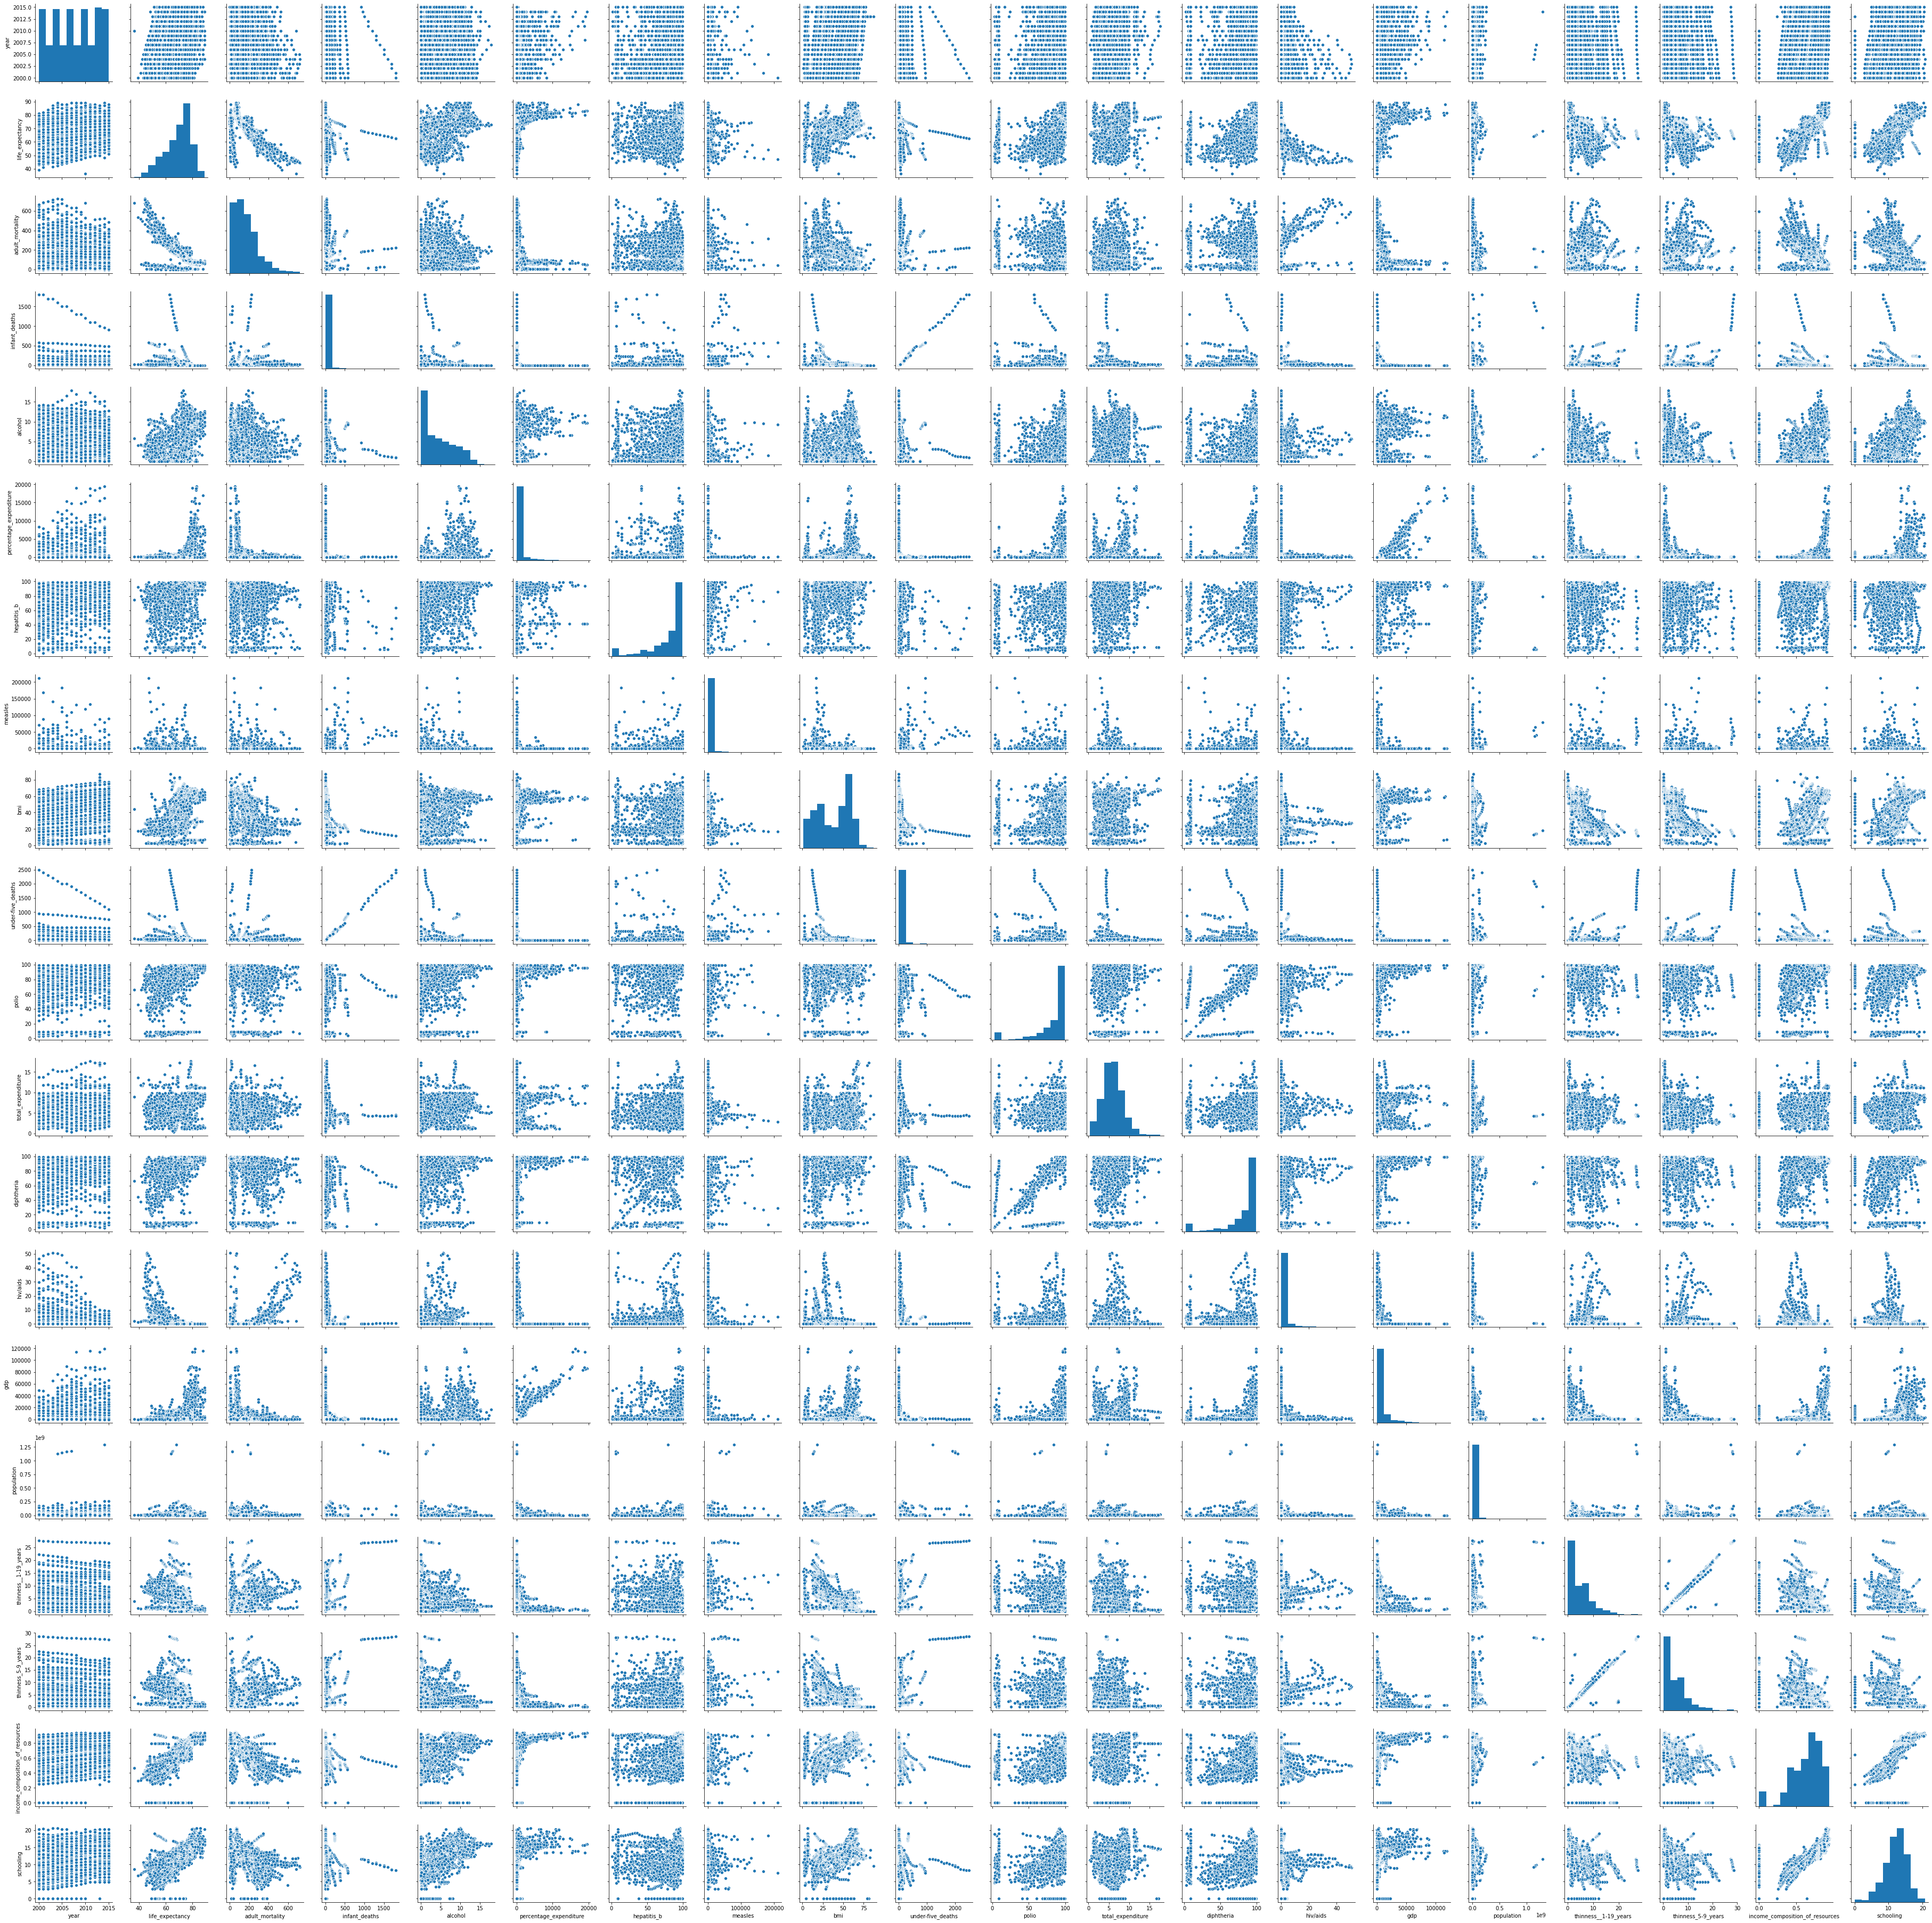

In [27]:
sns.pairplot(df)

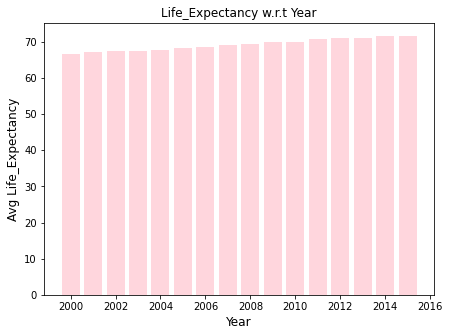

In [28]:
plt.figure(figsize=(7,5))
plt.bar(df.groupby('year')['year'].count().index,df.groupby('year')['life_expectancy'].mean(),color='pink',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Year")
plt.show()

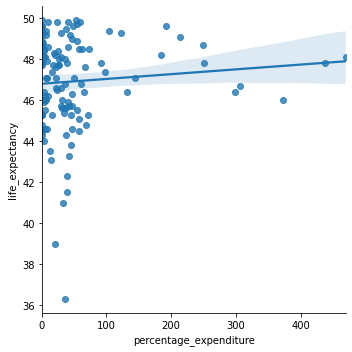

In [29]:
less_than_50 = df[df['life_expectancy'] < 50]
sns.lmplot(x='percentage_expenditure',y='life_expectancy',data=less_than_50)

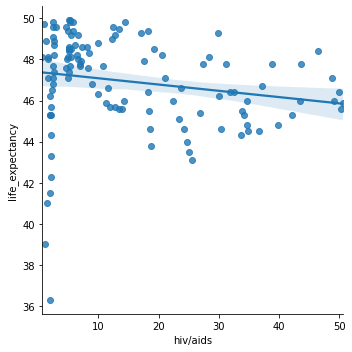

In [30]:
less_than_50 = df[df['life_expectancy'] < 50]
sns.lmplot(x='hiv/aids',y='life_expectancy',data=less_than_50)

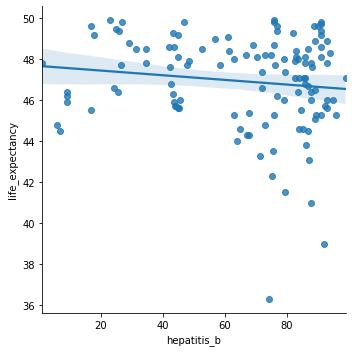

In [31]:
less_than_50 = df[df['life_expectancy'] < 50]
sns.lmplot(x='hepatitis_b',y='life_expectancy',data=less_than_50)

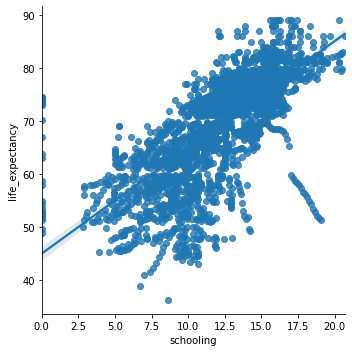

In [32]:
sns.lmplot(x='schooling',y='life_expectancy',data=df)

In [33]:
round(df[['status','life_expectancy']].groupby(['status']).mean(),2)

life_expectancy
status                     
Developed             79.20
Developing            67.11

In [34]:
df.groupby('country').mean().sort_values(by='life_expectancy',ascending=False)

year  life_expectancy  adult_mortality  \
country                                                              
Japan                     2007.5         82.53750          57.1250   
Sweden                    2007.5         82.51875          59.1875   
Iceland                   2007.5         82.44375          49.3750   
Switzerland               2007.5         82.33125          55.7500   
France                    2007.5         82.21875          73.1250   
...                          ...              ...              ...   
Malawi                    2007.5         49.89375         424.4375   
Angola                    2007.5         49.01875         328.5625   
Lesotho                   2007.5         48.78125         550.0625   
Central African Republic  2007.5         48.51250         333.0625   
Sierra Leone              2007.5         46.11250         357.8125   

                          infant_deaths    alcohol  percentage_expenditure  \
country                                                                      
Japan                            2.8750   6.709062             3923.050329   
Sweden                           0.0000   6.946562             4438.163154   
Iceland                          0.0000   7.614063             4991.595308   
Switzerland                      0.0000  10.185937             9801.810377   
France                           2.9375  12.257188             3751.506574   
...                                 ...        ...                     ...   
Malawi                          37.1250   0.898437               25.849706   
Angola                          83.7500   5.650000              102.100268   
Lesotho                          4.5000   2.027187               82.118913   
Central African Republic        16.5000   1.392187               40.905543   
Sierra Leone                    27.5625   3.215313               29.105579   

                          hepatitis_b    measles       bmi  under-five_deaths  \
country                                                                         
Japan                       72.225000  6875.8125  25.60625             4.0000   
Sweden                      47.227679    18.9375  56.25000             0.0000   
Iceland                     88.545455     0.0000  51.07500             0.0000   
Switzerland                 41.303571   397.5000  51.43750             0.0000   
France                      51.250000  2661.6250  51.98125             3.4375   
...                               ...        ...       ...                ...   
Malawi                      88.562500  7559.4375  16.78125            58.7500   
Angola                      77.125000  3561.3125  18.01875           132.6250   
Lesotho                     65.968750   266.6875  25.23750             6.3125   
Central African Republic    43.375000   699.4375  17.08750            24.5000   
Sierra Leone                81.718750   673.8750  18.30625            41.8750   

                            polio  total_expenditure  diphtheria  hiv/aids  \
country                                                                      
Japan                     96.0000           6.288125     96.2500   0.10000   
Sweden                    98.3125           9.849062     98.3125   0.10000   
Iceland                   89.7500           8.526250     89.7500   0.10000   
Switzerland               95.3750           6.326875     94.5625   0.10000   
France                    98.2500           6.732500     98.0625   0.10000   
...                           ...                ...         ...       ...   
Malawi                    89.0625           6.779375     83.6250  16.68125   
Angola                    46.1250           3.886875     47.6875   2.36875   
Lesotho                   67.9375           7.240625     79.4375  22.96875   
Central African Republic  41.3125           4.189063     42.4375   8.98125   
Sierra Leone              71.7500           9.158125     72.1250   1.51875   

                                 

### Preprocessing the data

In [35]:
df.isnull().sum()

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under-five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness__1-19_years               0
thinness_5-9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64

In [36]:
df['status'] = LabelEncoder().fit_transform(df['status'])

In [37]:
df

country  year  status  life_expectancy  adult_mortality  \
0     Afghanistan  2015       1             65.0            263.0   
1     Afghanistan  2014       1             59.9            271.0   
2     Afghanistan  2013       1             59.9            268.0   
3     Afghanistan  2012       1             59.5            272.0   
4     Afghanistan  2011       1             59.2            275.0   
...           ...   ...     ...              ...              ...   
2933     Zimbabwe  2004       1             44.3            723.0   
2934     Zimbabwe  2003       1             44.5            715.0   
2935     Zimbabwe  2002       1             44.8             73.0   
2936     Zimbabwe  2001       1             45.3            686.0   
2937     Zimbabwe  2000       1             46.0            665.0   

      infant_deaths  alcohol  percentage_expenditure  hepatitis_b  measles  \
0                62     0.01               71.279624         65.0     1154   
1                64     0.01               73.523582         62.0      492   
2                66     0.01               73.219243         64.0      430   
3                69     0.01               78.184215         67.0     2787   
4                71     0.01                7.097109         68.0     3013   
...             ...      ...                     ...          ...      ...   
2933             27     4.36                0.000000         68.0       31   
2934             26     4.06                0.000000          7.0      998   
2935             25     4.43                0.000000         73.0      304   
2936             25     1.72                0.000000         76.0      529   
2937             24     1.68                0.000000         79.0     1483   

      ...  polio  total_expenditure  diphtheria  hiv/aids         gdp  \
0     ...    6.0               8.16        65.0       0.1  584.259210   
1     ...   58.0               8.18        62.0       0.1  612.696514   
2     ...   62.0               8.13        64.0       0.1  631.744976   
3     ...   67.0               8.52        67.0       0.1  669.959000   
4     ...   68.0               7.87        68.0       0.1   63.537231   
...   ...    ...                ...         ...       ...         ...   
2933  ...   67.0               7.13        65.0      33.6  454.366654   
2934  ...    7.0               6.52        68.0      36.7  453.351155   
2935  ...   73.0               6.53        71.0      39.8   57.348340   
2936  ...   76.0               6.16        75.0      42.1  548.587312   
2937  ...   78.0               7.10        78.0      43.5  547.358879   

      population  thinness__1-19_years  thinness_5-9_years  \
0     33736494.0                  17.2                17.3   
1       327582.0                  17.5                17.5   
2     31731688.0                  17.7                17.7   
3      3696958.0                  17.9                18.0   
4      2978599.0                  18.2                18.2   
...          ...                   ...                 ...   
2933  12777511.0                   9.4                 9.4   
2934  12633897.0                   9.8                 9.9   
2935    125525.0                   1.2                 1.3   
2936  12366165.0                   1.6                 1.7   
2937  12222251.0                  11.0                11.2   

      income_composition_of_resources  schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937                            0.434        9.8  

[2938 row

In [38]:
# Train & Test Data
X = df.drop(['country','life_expectancy','year'],axis=1)
y = df['life_expectancy']

In [39]:
X


status  adult_mortality  infant_deaths  alcohol  percentage_expenditure  \
0          1            263.0             62     0.01               71.279624   
1          1            271.0             64     0.01               73.523582   
2          1            268.0             66     0.01               73.219243   
3          1            272.0             69     0.01               78.184215   
4          1            275.0             71     0.01                7.097109   
...      ...              ...            ...      ...                     ...   
2933       1            723.0             27     4.36                0.000000   
2934       1            715.0             26     4.06                0.000000   
2935       1             73.0             25     4.43                0.000000   
2936       1            686.0             25     1.72                0.000000   
2937       1            665.0             24     1.68                0.000000   

      hepatitis_b  measles   bmi  under-five_deaths  polio  total_expenditure  \
0            65.0     1154  19.1                 83    6.0               8.16   
1            62.0      492  18.6                 86   58.0               8.18   
2            64.0      430  18.1                 89   62.0               8.13   
3            67.0     2787  17.6                 93   67.0               8.52   
4            68.0     3013  17.2                 97   68.0               7.87   
...           ...      ...   ...                ...    ...                ...   
2933         68.0       31  27.1                 42   67.0               7.13   
2934          7.0      998  26.7                 41    7.0               6.52   
2935         73.0      304  26.3                 40   73.0               6.53   
2936         76.0      529  25.9                 39   76.0               6.16   
2937         79.0     1483  25.5                 39   78.0               7.10   

      diphtheria  hiv/aids         gdp  population  thinness__1-19_years  \
0           65.0       0.1  584.259210  33736494.0                  17.2   
1           62.0       0.1  612.696514    327582.0                  17.5   
2           64.0       0.1  631.744976  31731688.0                  17.7   
3           67.0       0.1  669.959000   3696958.0                  17.9   
4           68.0       0.1   63.537231   2978599.0                  18.2   
...          ...       ...         ...         ...                   ...   
2933        65.0      33.6  454.366654  12777511.0                   9.4   
2934        68.0      36.7  453.351155  12633897.0                   9.8   
2935        71.0      39.8   57.348340    125525.0                   1.2   
2936        75.0      42.1  548.587312  12366165.0                   1.6   
2937        78.0      43.5  547.358879  12222251.0                  11.0   

      thinness_5-9_years  income_composition_of_resources  schooling  
0                   17.3                            0.479       10.1  
1                   17.5                            0.476       10.0  
2                   17.7                            0.470        9.9  
3                   18.0                            0.463        9.8  
4                   18.2                            0.454        9.5  
...                  ...                              ...        ...  
2933                 9.4                            0.407        9.2  
2934                 9.9                            0.418        9.5  
2935                 1.3                            0.427       10.0  
2936                 1.7                            0.427        9.8  
2937                11.2                            0.434        9.8  

[2938 rows x 19 columns]

In [40]:
min_max_scaler = MinMaxScaler()

In [41]:
x = min_max_scaler.fit_transform(X)

In [42]:
x

array([[1.        , 0.36288089, 0.03444444, ..., 0.60350877, 0.50527426,
        0.48792271],
       [1.        , 0.37396122, 0.03555556, ..., 0.61052632, 0.5021097 ,
        0.48309179],
       [1.        , 0.36980609, 0.03666667, ..., 0.61754386, 0.49578059,
        0.47826087],
       ...,
       [1.        , 0.09972299, 0.01388889, ..., 0.04210526, 0.45042194,
        0.48309179],
       [1.        , 0.94875346, 0.01388889, ..., 0.05614035, 0.45042194,
        0.47342995],
       [1.        , 0.91966759, 0.01333333, ..., 0.38947368, 0.45780591,
        0.47342995]])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Linear Regression and additions

In [44]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)


LinearRegression()

#### Model Evaluation

In [45]:
print(linear_model.intercept_)

55.75489540075864


In [54]:
coeff_df = pd.DataFrame(linear_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
status                          -1.158646e+00
adult_mortality                 -1.936460e-02
infant_deaths                    1.061669e-01
alcohol                          7.786336e-02
percentage_expenditure           1.199771e-04
hepatitis_b                     -1.131842e-02
measles                         -3.194979e-05
bmi                              4.891686e-02
under-five_deaths               -8.062478e-02
polio                            2.865492e-02
total_expenditure                5.576421e-02
diphtheria                       3.785514e-02
hiv/aids                        -4.489351e-01
gdp                              4.243776e-05
population                       2.965832e-09
thinness__1-19_years            -1.061897e-01
thinness_5-9_years               4.924177e-02
income_composition_of_resources  5.531372e+00
schooling                        6.467769e-01

In [46]:
print('R_square score on the training: %.2f' % linear_model.score(X_train, y_train))

R_square score on the training: 0.82


In [47]:
print('Coefficients:\n',linear_model.coef_)
print('\n')
print('Intercept:\n',linear_model.intercept_)

Coefficients:
 [-1.15864612e+00 -1.93645984e-02  1.06166851e-01  7.78633615e-02
  1.19977139e-04 -1.13184184e-02 -3.19497885e-05  4.89168594e-02
 -8.06247846e-02  2.86549168e-02  5.57642068e-02  3.78551434e-02
 -4.48935149e-01  4.24377645e-05  2.96583168e-09 -1.06189676e-01
  4.92417733e-02  5.53137199e+00  6.46776898e-01]


Intercept:
 55.75489540075864


In [48]:
predictions = linear_model.predict(X_test)

In [49]:
Actual = y_test

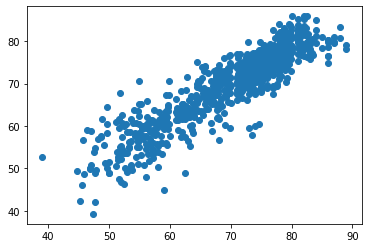

In [55]:
plt.scatter(y_test,predictions)

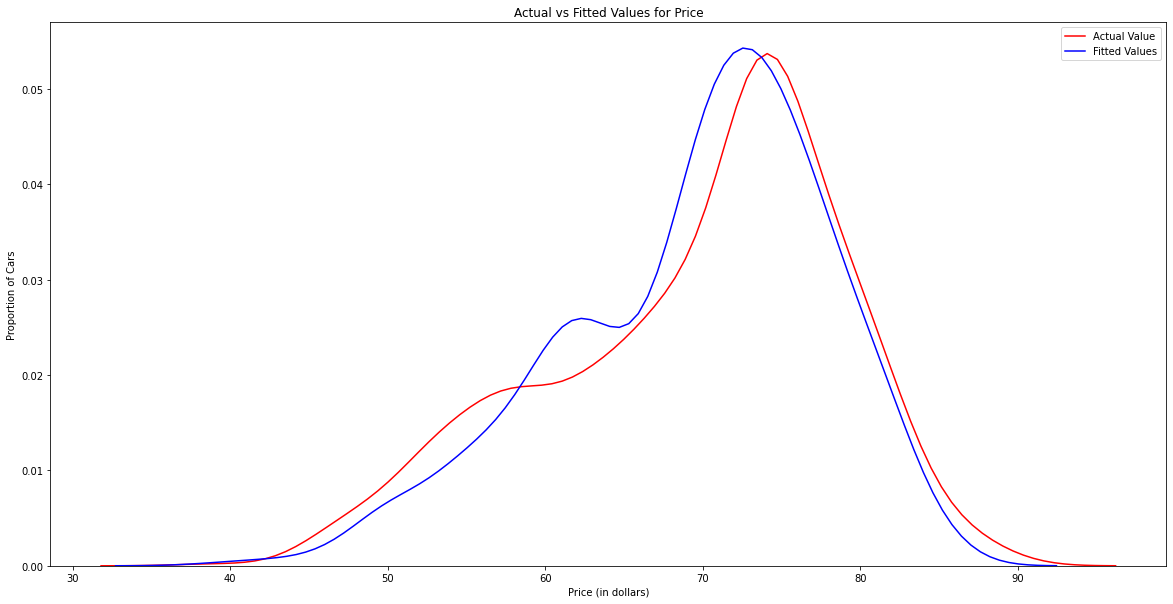

In [50]:
#comparison
plt.figure(figsize=(20, 10))


ax1 = sns.distplot(Actual, hist=False, color="r", label="Actual Value")
sns.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [51]:
print("Mean squared error: %.2f"% mean_squared_error(y_test, predictions))
print("Mean absolute error: %.2f"% mean_absolute_error(y_test, predictions))
print('R_square score: %.2f' % r2_score(y_test, predictions))

Mean squared error: 16.05
Mean absolute error: 3.01
R_square score: 0.81


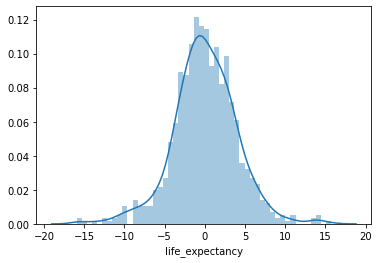

In [52]:
sns.distplot((y_test-predictions),bins=50);

In [53]:
################### I Have To Do More To Improve The Model ################################